Лабораторная работа 1.3.3

In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from math import log, sqrt

In [3]:
# const
n_p = 0.2 * 9.81
d_1 = 4.1e-3
sigma_d_1 = 0.05e-3
sigma_d_2 = 0.1e-3
sigma_d_3 = 0.05e-3
sigma_d = [sigma_d_1, sigma_d_2, sigma_d_3] 
sigma_t = 0.2 * 2
sigma_p_1 = n_p * 0.5
sigma_p_2 = n_p * 2
sigma_V = 0.01

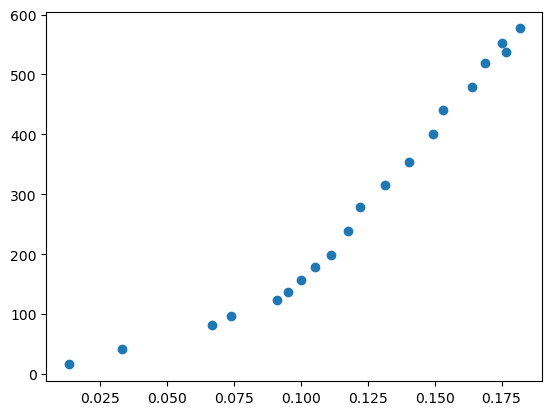

In [4]:
# Зависимость разности давленийа от расхода,  эксперимент на трубе 1 с d_1 = 4.1 +- 0.5 mm 

# Разность давлений
n_1 = np.array([8, 21, 42, 49, 63, 70, 80, 91, 101, 122, 142, 161, 180, 204, 225, 244, 265, 274, 282, 294])
delta_p_1 = n_1 * n_p

# Расход
V_1 = np.array([1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])  # Литры
t_1 = np.array([75, 30, 15, 27, 22, 21, 20, 19, 18, 17, 16.37, 15.22, 14.25, 13.40, 13.06, 12.19, 
                    11.85, 11.32, 11.41, 11.00])
Q_1 = V_1 / t_1

epsilon_V_1 = sigma_V / V_1
epsilon_t_1 = sigma_t / t_1
epsilon_Q_1 = []

for i in range(len(V_1)):
    epsilon_Q_1.append(sqrt(epsilon_V_1[i] ** 2 + epsilon_t_1[i] ** 2))

epsilon_Q_1_np = np.array(epsilon_Q_1)

sigma_Q = epsilon_Q_1_np * Q_1

plt.scatter(Q_1, delta_p_1)

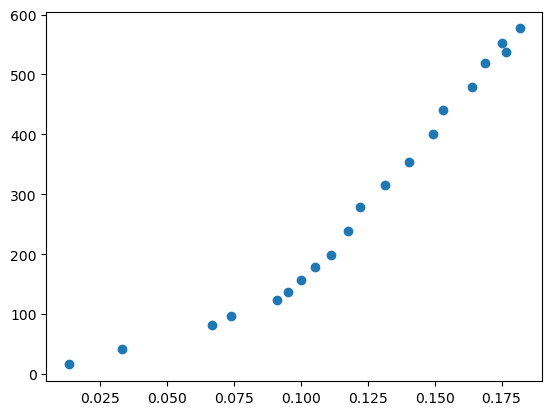

In [5]:
# Распределение давлений по трубе
l_2 = np.array([10.5, 30, 40, 50]) * 1e-2
delta_p_2 = np.array([76, 79, 90, 113]) * n_p

L_2 = np.array([10.5, 40.5, 80.5, 135.5]) * 1e-2
P_2 = np.array([76, 76 + 79, 90 + 76 + 79, 133 + 90 + 76 + 79]) * n_p

#plt.scatter(L_2, P_2)

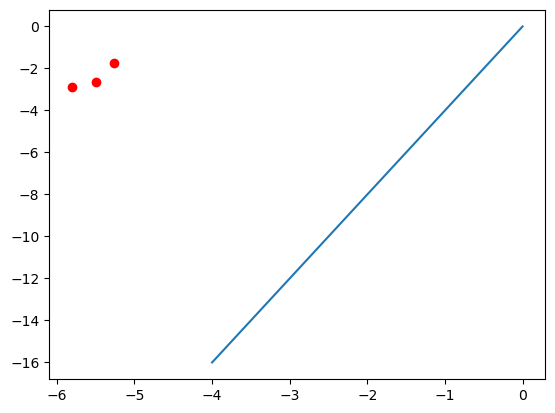

In [6]:
# Зависимость расхода от радиуса

delta_P_1 = 47.5 * n_p 
d = np.array([4.1, 3, 5.2]) * 1e-3
L = np.array([50, 30, 50]) * 1e-2
dP_dL = delta_P_1 / L[1]
delta_P_3 = delta_p_1
delta_P_2 = dP_dL * L[1]
V = np.array([2, 2, 2]) #  Литры
t = np.array([28.65, 36.38, 11.6])

Q = V / t

epsilon_t = sigma_t / t
epsilon_V = sigma_V / V
epsilon_Q = []
for i in range(len(V)):
    epsilon_Q.append(sqrt(epsilon_V[i] ** 2 + epsilon_t[i] ** 2))
epsilon_Q_np = np.array(epsilon_Q)
sigma_Q = epsilon_Q_np * Q

epsilon_d = []
ln_d = []
ln_Q = []
ln_sigma_d = []
ln_sigma_Q = []
for i in range(3):
    epsilon_d.append(sigma_d[i] / d[i])
    ln_Q.append(log(Q[i]))
    ln_d.append(log(d[i]))
    ln_sigma_Q.append(epsilon_Q[i] * ln_Q[i])
    ln_sigma_d.append(epsilon_d[i] * ln_d[i])

plt.scatter(ln_d, ln_Q, color='red')
x = [-4, 0]
y = [-16, 0]
plt.plot(x, y)  # Теоретическая прямая y=4x